In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
d0 = pd.read_csv('train.csv')
d0.head(5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
l=d0['label']
d=d0.drop(['label'],axis=1)# drop the label of the dataset
d.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


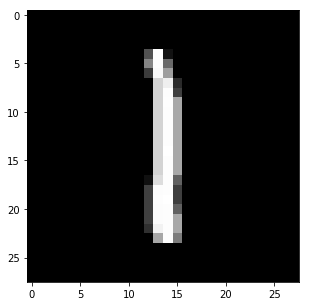

1


In [17]:
#plot a digit from the dataset 
plt.figure(figsize=(5,5))
dig_index=1000 #give values between  0 to 42K
dig=d.iloc[dig_index].as_matrix().reshape(28,28)
plt.imshow(dig, interpolation = "none", cmap = "gray")
plt.show()
print(l[dig_index])


In [19]:
#2_-D Visualization Using PCA Part-1 not using library function
labels=l.head(15000)
data=d.head(15000)
print("Shape of sample data",data.shape)

Shape of sample data (15000, 784)


In [20]:
# we have to convert these 15000 X 784 to 15000 X 2 Using PCA


In [21]:
#step-1
#Data-preprocessing to standaridized your column between with mean as 0 and varaince as 1
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [22]:
#step-2
# Find a Covariance Matrix of size 784 X 784 to calculate eigen values and eigen vectors

sample_data = standardized_data

# matrix multiplication using numpy 
covar_matrix = np.matmul(sample_data.T , sample_data)# finding transpose of matrix

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [23]:
#step-3
#find now eigen value and eigen vectors
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [24]:
#step-4
#Multiply eigen vectors with our sample data to get reduced size of matrix 15000 X 2
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "*", sample_data.T.shape," = ", new_coordinates.shape)


 resultanat new data points' shape  (2, 784) * (784, 15000)  =  (2, 15000)


In [25]:
#now append labels to our dataset to visualize the data set
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


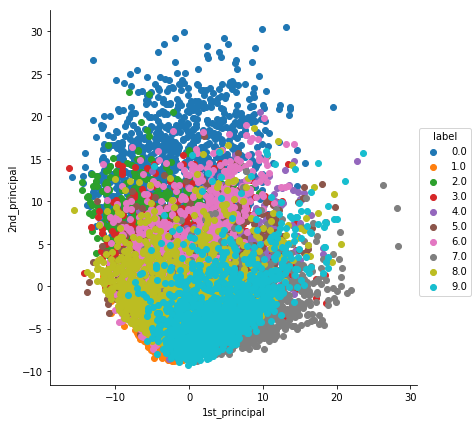

In [26]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [27]:
#PCA Using scikit-learn in simple lines of code
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [28]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2  #we need 2-D dataset to visualize
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


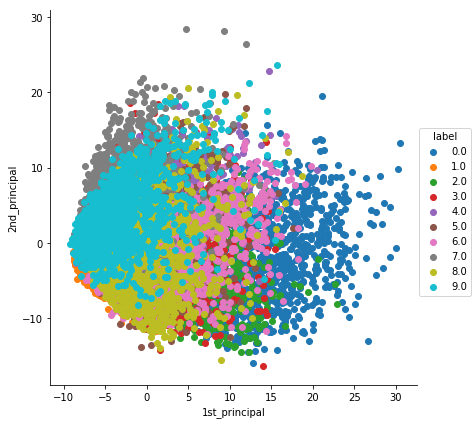

In [29]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()